In [ ]:
import pandas as pd   #library for data manipiulation and analysis
import matplotlib.pyplot as plt   #biblioteca de graficos
import seaborn as sns   #biblioteca de visualizacion de datos

In [ ]:
import nltk   #bring natural language toolkit for working with human-language data
from nltk.tokenize import word_tokenize, sent_tokenize
                    #word_tokenize: splits text into individual words
                    #sent_tokenize: splits text into individual sentences
nltk.download('punkt_tab')  #main tokenizer for word and sentence tokenization

In [ ]:
!unrar x "/content/sample_data/reviews_dataframe_completo.rar"

In [ ]:
csv_path = "/content/sample_data/reviews_dataframe_completo.csv"
original_data = pd.read_csv(csv_path)     #uses pandas to read the CSV and assigned to original data

In [ ]:
plt.figure(figsize=(8,4))     #creates a figure with a custom size 8, 4
sns.countplot(x='stars', data=original_data)    #grafico de conteo
plt.title('Distribución de las Estrellas')
plt.show()

In [ ]:
original_data.head(3)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore


In [ ]:
product_category = original_data['product_category'].value_counts() #counts how many times each cattegory appears
if len(product_category) > 10:    #if there are more than 10 categories, the code takes the top 9, sums the rest in "Others"
    top_categories = product_category.iloc[:9].copy()
    other_categories = product_category.iloc[9:].sum()
    top_categories['Otras'] = other_categories
else:
    top_categories = product_category

categories = top_categories.index   #creates a bar chart showing the number of products in each category
values = top_categories.values

plt.figure(figsize=(12,6))
plt.bar(categories, values, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Distribución de las Categorías de Productos')
plt.tight_layout()
plt.show()

In [ ]:
plt.scatter(categories, values, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.figure(figsize=(12,6))
plt.show()

In [ ]:
plt.bar(categories, values, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.figure(figsize=(12,6))
plt.show()

In [ ]:
plt.plot(categories, values)
plt.xticks(rotation=45, ha="right")
plt.show()

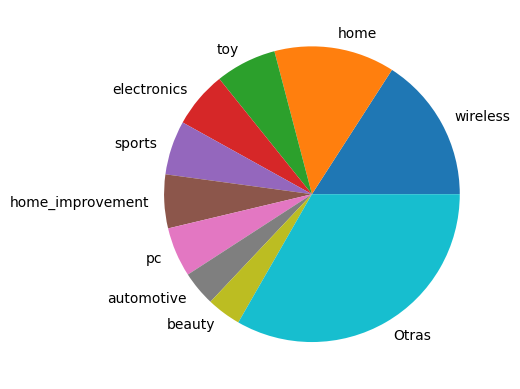

In [ ]:
plt.figure()
plt.pie(values, labels=categories)
plt.show()

                PREPOCESAMIENTO INICIAL Y LIMPIEZA DEL TEXTO

In [ ]:
filter_data = original_data[["review_body", "stars"]].copy()  #selects the 2 columns and makes a copy
filter_data.isnull().sum()    #returns the number of NaN(missing) values per column

,0
review_body,0
stars,0


In [ ]:
import re   #imports regular expression(regex) module
import string   #import string module

In [ ]:
def clean(text):
  text = str(text).lower()    #convertir a minusculas
  text = re.sub(r'\[.*?\]', '', text)    #eliminar textos entre corchetes
  text = re.sub(r'https?://\S+|www\.\S+', '', text)    #eliminar urls
  text = re.sub(r'<.*?>+', '', text)  #eliminar etiquetas HTML
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)    #eliminar signos de puntuacion
  text = re.sub(r'\n', ' ', text)   #eliminar los saltos de linea
  text = re.sub(r'\w*\d\w*', '', text)    #eliminar palabras con numeros
  text = re.sub(r'[^\x00-\x7F]+', '', text)   #eliminar caracter not ascii
  text = text.strip()   #elimina espacios en blancos
  return text

In [ ]:
filter_data["clean_review"] = filter_data["review_body"].apply(clean)
              #create a new column theat applies the function clean to every entry in the review_body column
filter_data[['review_body', 'clean_review']].head(3)

,review_body,clean_review
0,Nada bueno se me fue ka pantalla en menos de 8...,nada bueno se me fue ka pantalla en menos de ...
1,"Horrible, nos tuvimos que comprar otro porque ...",horrible nos tuvimos que comprar otro porque n...
2,Te obligan a comprar dos unidades y te llega s...,te obligan a comprar dos unidades y te llega s...


In [ ]:
sample_text = filter_data["clean_review"].iloc[0] #assigns to sample_text the first row(index 0) of the clean_review column
print("Texto de ejemplo: ", sample_text)

Texto de ejemplo:  nada bueno se me fue ka pantalla en menos de  meses y no he recibido respuesta del fabricante


    TOKENIZACIÓN Y SEGMENTACIÓN
     

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt_tab')  #model multilingue

In [ ]:
tokens_nltk = word_tokenize(sample_text, language='spanish')
        #word_tokenize function to split the text into individual word tokens
sentences_nltk = sent_tokenize(sample_text, language='spanish')
        #sentence_tokenize function that splits the text into sentences
print(tokens_nltk)
print(sentences_nltk)

['nada', 'bueno', 'se', 'me', 'fue', 'ka', 'pantalla', 'en', 'menos', 'de', 'meses', 'y', 'no', 'he', 'recibido', 'respuesta', 'del', 'fabricante']
['nada bueno se me fue ka pantalla en menos de  meses y no he recibido respuesta del fabricante']


In [ ]:
import spacy

In [ ]:
!python3 -m spacy download es_core_news_sm

In [ ]:
nlp_es = spacy.load('es_core_news_sm')    #loads spaCys pre-trained pipeline
doc_es = nlp_es(sample_text)    #runs the pipeline on the text

In [ ]:
tokens_spacy = [token.text for token in doc_es]    #build a list of every token text in the document
sentences_spacy = [sent.text for sent in doc_es.sents]   #builds a list of full sentences strings
print(tokens_spacy)
print(sentences_spacy)

['nada', 'bueno', 'se', 'me', 'fue', 'ka', 'pantalla', 'en', 'menos', 'de', ' ', 'meses', 'y', 'no', 'he', 'recibido', 'respuesta', 'del', 'fabricante']
['nada bueno se me fue ka pantalla en menos de  meses y no he recibido respuesta del fabricante']


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [ ]:
nltk.download('stopwords')
stopword_es = set(stopwords.words('spanish'))

In [ ]:
stemmer_es = SnowballStemmer('spanish')   #load snowball spanish stemmer for later use
sample_text = filter_data["clean_review"].iloc[0]   #the firsts clean review from your dataframe

tokens_nltk = word_tokenize(sample_text, language='spanish')    #split the text into tokens
print("Tokens", tokens_nltk)

tokens_no_stop = [token for token in tokens_nltk if token not in stopword_es]
print("Tokens sin stopwords", tokens_no_stop)   #keeps only the tokens that are not in spanish stop-word list

stemmed_tokens = [stemmer_es.stem(token) for token in tokens_no_stop]
print("Tokens Stemming", stemmed_tokens)    #reduces each token to its stem/root

doc_es = nlp_es(sample_text)
lemmatized_tokens = [token.lemma_ for token in doc_es if token.text.lower() not in stopword_es]
print("Tokens Lematizacion", lemmatized_tokens)   #runs the same sentence through spacy spanish model

Tokens ['nada', 'bueno', 'se', 'me', 'fue', 'ka', 'pantalla', 'en', 'menos', 'de', 'meses', 'y', 'no', 'he', 'recibido', 'respuesta', 'del', 'fabricante']
Tokens sin stopwords ['bueno', 'ka', 'pantalla', 'menos', 'meses', 'recibido', 'respuesta', 'fabricante']
Tokens Stemming ['buen', 'ka', 'pantall', 'men', 'mes', 'recib', 'respuest', 'fabric']
Tokens Lematizacion ['bueno', 'ko', 'pantallar', 'menos', ' ', 'mes', 'recibir', 'respuesta', 'fabricante']


In [ ]:
from wordcloud import WordCloud, STOPWORDS    #a utility that turns a body of text into a word-cloud image
import matplotlib.pyplot as plt   #STOPWORDS a built-in-set of common words

In [ ]:
text = " ".join(review for review in filter_data["clean_review"])   #merges every string in the clean_review column into one long text
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, width=800, height=800).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')   #draw the cloud
plt.axis("off")                                   #no axes
plt.title("Nube de palabras - Reseñas Limpias")
plt.show()    #generate the world cloud   stopwords:drop common words like "the", "y", "de"

In [ ]:
def clean_with_stopwords_and_stemming(text):
  text = " ".join(token for token in text.split() if token not in stopword_es)
      #splits the sentence into tokens with split(). rejoins the remaining tokens into a single string
  text = " ".join([stemmer_es.stem(token) for token in text.split()])
      #splits the intermediate string again. stemmer_es.stem() to each token, reduce words to their roots
  return text.strip()   #removes any leading/trailing whitespace and return the cleaned, stemmed text

In [ ]:
filter_data["clean_review_stemming"] = filter_data["clean_review"].apply(clean_with_stopwords_and_stemming)
    #runs it through the function clean_with_stopwords_and_stemming
filter_data[['clean_review', 'clean_review_stemming']].head(3)
    #selects both the original cleaned text and its stemmed version

,clean_review,clean_review_stemming
0,nada bueno se me fue ka pantalla en menos de ...,buen ka pantall men mes recib respuest fabric
1,horrible nos tuvimos que comprar otro porque n...,horribl compr sab ingls informt despus hor cap...
2,te obligan a comprar dos unidades y te llega s...,oblig compr dos unidad lleg sol form reclam au...


In [ ]:
text = " ".join(review for review in filter_data["clean_review_stemming"])
    #concatenates every record in clean_review_stemming
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, width=800, height=800).generate(text)
    #uses the stemmed text list to create the image, the most frequent stems appear largest
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras - Reseñas Limpias + Stopwords + Stemming")
plt.show()    #shows an 800x800 word-cloud where words are stems, giving a frquency snapshot after stop-word removal and stemming

In [ ]:
def clean_with_stopwords_and_lemmatization(text):
  doc = nlp_es(text)  #nlp_es tokenises the input and assigns each token its lemma
  lemmatized = [token.lemma_ for token in doc if token.text.lower() not in stopword_es]   #dictionary form
  return " ".join(lemmatized).strip()   #the lemmas thats stills there are re-joined with spaces and trimmed, producing a stop-word-free lemmatised version of the original text

In [ ]:
filter_data["clean_review_lemmatization"] = filter_data["clean_review"].apply(clean_with_stopwords_and_lemmatization)
    #for every row it takes in clean_reviews, removes Spanish stop-words, replaces each remaining words with its lemma
filter_data[['clean_review', 'clean_review_lemmatization']].head(3)
    #shows the rows of the original cleaned text alongside its lemmatised version so you can quickly see how words were normalised

,clean_review,clean_review_lemmatization
0,nada bueno se me fue ka pantalla en menos de ...,bueno ko pantallar menos mes recibir respues...
1,horrible nos tuvimos que comprar otro porque n...,horrible comprar saber ingls informtico despus...
2,te obligan a comprar dos unidades y te llega s...,obligar comprar dos unidad llegar solo forma r...


In [ ]:
text = " ".join(review for review in filter_data["clean_review_lemmatization"])
  #merges every lemmatized, stop-word-free review into one long string
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600).generate(text)
  #generates the word cloud, builds an image where each lemma reflects its frequency
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras - Reseñas Limpias + Stopwords + Lematizacion")
plt.show()  #show the cloud, giving a visual summary of the most common lemmas in the cleaned reviews

In [ ]:
filter_data[["clean_review_lemmatization", "stars"]].to_csv("reviews_clean_advanced.csv", index=False)

# **BAG OF WORDS AND TF-IDF**

In [ ]:
import pandas as pd

In [ ]:
!unrar x "/content/sample_data/reviews_clean_advanced.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/sample_data/reviews_clean_advanced.rar


Would you like to replace the existing file reviews_clean_advanced.csv
428374 bytes, modified on 2025-04-22 20:07
with a new one
20640418 bytes, modified on 2025-03-17 13:26

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Y

Extracting  reviews_clean_advanced.csv                                    70%100%  OK 
All OK


In [ ]:
csv_path = "/content/sample_data/reviews_clean_advanced.csv"
filter_data = pd.read_csv(csv_path)   #load the file, reads the csv into a pandas DataFrame
filter_data.head(3)
filter_data.isnull().sum()  #check for missing values, returns a count of NaN in each column
filter_data = filter_data.dropna()  #remove any rows that contain NaN, after that filter_data contains only complete rows

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    #CountVectorizer  counts how many times each token appears in each document
    #TfidfVectorizer  terms common to one doc, but rare overall, get higher weights

In [ ]:
corpus = filter_data["clean_review_lemmatization"].tolist()
    #each element is one lemmatized, and pass this list to a vectorizer

In [ ]:
cv = CountVectorizer()  #instantiate the vectorizer
bow_matrix = cv.fit_transform(corpus)   #fit to the text and transform it
print("Dimensiones de la matriz bag-of-words: ", bow_matrix.shape)
print("Ejemplos d eterminos (BoW): ", cv.get_feature_names_out()[:10])  #peak at the vocabulary

Dimensiones de la matriz bag-of-words:  (209999, 61223)
Ejemplos d eterminos (BoW):  ['aa' 'aaa' 'aaaa' 'aaaaa' 'aaaaaa' 'aaao' 'aac' 'aad' 'aada' 'aadar']


In [ ]:
tfidf = TfidfVectorizer()
  #crea un vectorizador TF-IDF que podera cada token por frecuencia
tfidf_matrix = tfidf.fit_transform(corpus)
  #fit:construye el vocabulario con todas las palabras del corpus
  #transform: convierte cada reseña en una fila numerica donde cada columna es el peso
print("Dimensiones de la matriz TF-IDF: ", tfidf_matrix.shape)
print("Ejemplos de términos (TF-IDF): ", tfidf.get_feature_names_out()[:10])

Dimensiones de la matriz TF-IDF:  (209999, 61223)
Ejemplos de términos (TF-IDF):  ['aa' 'aaa' 'aaaa' 'aaaaa' 'aaaaaa' 'aaao' 'aac' 'aad' 'aada' 'aadar']


3 - LDA to extract topics and reviews key - aplicar LDA sobre la matriz de BoW para extraer 5 temas

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
    #creates an LDA model that will discover 5 latent topics in your bag of words data
lda = lda.fit(bow_matrix)
    #fit(bow_matrix)  learns the topic-word and cosument-topic distributions from BoW matrix

In [ ]:
def display_topics(model, feature_names, no_top_words):
  for topic_idx, topic in enumerate(model.components_):
    # iterate over each row, where each row is the word-weight vector for one topic
    print("Tema %d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
display_topics(lda, cv.get_feature_names_out(), 10)
  #to list the 10 strongest terms that define each of your five LDA topics.

Tema 0:
llegar producto él venir devolver dar poder amazon caja si
Tema 1:
funcionar bien él luz dar dejar cable batera ms ir
Tema 2:
bien él si hacer poder quedar ir pantalla poner ms
Tema 3:
calidad buen precio bien producto ms cumplir bonito perfecto color
Tema 4:
bien ms él pequeo perfecto grande comprar gustar tamao si


4 - CLASIFICACION TRADICIONAL PARA ANALISIS DE SENTIIENTOS Y CATEGORIAS

In [ ]:
#!pip install -U scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split  #splits the matrix into training and validation
from sklearn.naive_bayes import MultinomialNB   #imports a classifier, useful for BoW or TF-IDF text vectors
from sklearn.metrics import classification_report, accuracy_score #gives overall proportion of correct predictions

In [ ]:
#crear la variable binaria de sentimiento: if(stars > 3) ? 1(positivo) : 0(negativo)
filter_data["sentiment_bin"] = filter_data["stars"].apply(lambda x: 1 if x > 3 else 0)

In [ ]:
#usar la representacion TF-IDF para el modelo
x = tfidf_matrix  #holds the features
y = filter_data["sentiment_bin"]  #holds the labels

In [ ]:
#dividir el dataset en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#entrenar el clasificador naive bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [ ]:
#evaluar el modelo
y_pred = nb_classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificacion: \n", classification_report(y_test, y_pred))

Accuracy: 0.7911190476190476
Reporte de clasificacion: 
               precision    recall  f1-score   support

           0       0.78      0.92      0.84     25204
           1       0.83      0.60      0.70     16796

    accuracy                           0.79     42000
   macro avg       0.80      0.76      0.77     42000
weighted avg       0.80      0.79      0.78     42000



In [ ]:
###############GUARDAR el modelo##############################################
import joblib
model_path = "/content/sample_data/nb_classifier_model.pkl"
joblib.dump(nb_classifier, model_path)

['/content/sample_data/nb_classifier_model.pkl']

In [ ]:
################CARGAR el modelo###############################################
mi_modelo = joblib.load(model_path)

In [ ]:
import re   #imports regular expression(regex) module
import string
def clean(text):
  text = str(text).lower()    #convertir a minusculas
  text = re.sub(r'\[.*?\]', '', text)    #eliminar textos entre corchetes
  text = re.sub(r'https?://\S+|www\.\S+', '', text)    #eliminar urls
  text = re.sub(r'<.*?>+', '', text)  #eliminar etiquetas HTML
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)    #eliminar signos de puntuacion
  text = re.sub(r'\n', ' ', text)   #eliminar los saltos de linea
  text = re.sub(r'\w*\d\w*', '', text)    #eliminar palabras con numeros
  text = re.sub(r'[^\x00-\x7F]+', '', text)   #eliminar caracter not ascii
  text = text.strip()   #elimina espacios en blancos
  return text

In [ ]:
!python3 -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 125.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


review

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword_es = set(stopwords.words('spanish'))
import spacy
nlp_es = spacy.load('es_core_news_sm')
def clean_with_stopwords_and_lemmatization(text):
  doc = nlp_es(text)  #procesar el texto usando spacy
  lemmatized = [token.lemma_ for token in doc if token.text.lower() not in stopword_es] #eliminar stopwords y aplicar lematization
  return " ".join(lemmatized).strip() #unir los tokens lematizados y eliminar espacios extra

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
new_review = "Este producto es excelente y supero mis expectativas."
new_review_clean = clean(new_review)
new_review_clean = clean_with_stopwords_and_lemmatization(new_review_clean)
new_vector = tfidf.transform([new_review_clean])
prediction = mi_modelo.predict(new_vector)
print("Prediccion de sentimiento:", prediction[0])

Prediccion de sentimiento: 1


In [ ]:
new_review = "Lo odio!"
new_review_clean = clean(new_review)
new_review_clean = clean_with_stopwords_and_lemmatization(new_review_clean)
new_vector = tfidf.transform([new_review_clean])
prediction = mi_modelo.predict(new_vector)
print("Texto de ejemplo:", new_review)
print("Prediction of sentiment:", prediction[0])

Texto de ejemplo: Lo odio!
Prediction of sentiment: 0


In [ ]:
new_review = "me encanto?"
new_review_clean = clean(new_review)
new_review_clean = clean_with_stopwords_and_lemmatization(new_review_clean)
new_vector = tfidf.transform([new_review_clean])
prediction = mi_modelo.predict(new_vector)
print("Texto de ejemplo:", new_review)
print("Prediction of sentiment:", prediction[0])

Texto de ejemplo: me encanto?
Prediction of sentiment: 1


VISUALIZACION DE LA CONFIGURACION DE BERT

In [ ]:
from transformers import BertConfig, BertModel

In [ ]:
config = BertConfig.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
print("Numero de capa de BERT:", config.num_hidden_layers)

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

Numero de capa de BERT: 12


USO DE MODELOS PREENTRENADOS DE TRANSFORMERS PARA CLASIFICACION

In [ ]:
model = BertModel.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", output_hidden_states=True)
print(model)

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(31002, 768, padding_idx=1)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

VISUALIZACION DE CAPAS Y MODEL BERT

In [ ]:
from transformers import BertTokenizer
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")#cargamos tokenizer
model = BertModel.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", output_hidden_states=True)   #cargar bert

tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/480k [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
text = "El producto de Samsung Galaxy S21 llego el 12 de marzo y supero mis expectativas."
inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128)
outputs = model(**inputs)
print(outputs)

In [ ]:
hidden_states = outputs.hidden_states
print("Numero de capas de BERT (incluyendo la capa de embedding): ", len(hidden_states))

Numero de capas de BERT (incluyendo la capa de embedding):  13


BPE(Byte Pair Encoding) y WordPiece: estas tecnicas segmentan las palabras en subunidades (subword units) para manejar vocabularios abiertos y palabras poco frecuentes

In [ ]:
csv_path_df = "/content/sample_data/reviews_dataframe_completo.csv"
data = pd.read_csv(csv_path_df)

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

In [ ]:
#Ejemplo de tokenizacion de una reseña
sample_text = data["review_body"].iloc[0]
tokens = tokenizer.tokenize(sample_text)
print("Texto de ejemplo: ", sample_text)
print("Tokens con Hugging Face:", tokens)

CARGA Y EXPLORACION DEL DATASET

In [ ]:
from transformers import pipeline

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
new_review = "Este producto  es excelente y supero mis expectativas."
result = sentiment_pipeline(new_review)
print("Texto de ejemplo:", new_review)
print("Resultado del analisis de sentimiento:", result)

Texto de ejemplo: Este producto  es excelente y supero mis expectativas.
Resultado del analisis de sentimiento: [{'label': '5 stars', 'score': 0.7781029343605042}]


In [ ]:
new_review = "Lo odio!"
result = sentiment_pipeline(new_review)
print("Texto de ejemplo:", new_review)
print("Resultado del analisis de sentimiento:", result)

Texto de ejemplo: Lo odio!
Resultado del analisis de sentimiento: [{'label': '5 stars', 'score': 0.6118871569633484}]


In [ ]:
new_review = "me encanto?"
result = sentiment_pipeline(new_review)
print("Texto de ejemplo:", new_review)
print("Resultado del analisis de sentimiento:", result)

Texto de ejemplo: me encanto?
Resultado del analisis de sentimiento: [{'label': '5 stars', 'score': 0.4976470172405243}]


In [ ]:
new_review = "me encanto!"
result = sentiment_pipeline(new_review)
print("Texto de ejemplo:", new_review)
print("Resultado del analisis de sentimiento:", result)

Texto de ejemplo: me encanto!
Resultado del analisis de sentimiento: [{'label': '5 stars', 'score': 0.8713150024414062}]


4 - RECONOCIMIENTO DE ENTIDADES (NER) CON TRANSFORMERS

In [ ]:
from transformers import pipeline

In [ ]:
ner_pipeline = pipeline(
    "ner",
    model = "mrm8488/bert-spanish-cased-finetuned-ner",
    tokenizer = "mrm8488/bert-spanish-cased-finetuned-ner",
)

Some weights of the model checkpoint at mrm8488/bert-spanish-cased-finetuned-ner were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [ ]:
review = "El producto de Samsung Galaxy S21 llego el 12 de marzo y supero mis expectativas."
ner_result = ner_pipeline(review)
for result in ner_result:
  print(result)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'entity': 'B-ORG', 'score': np.float32(0.99496895), 'index': 4, 'word': 'Sam', 'start': 15, 'end': 18}
{'entity': 'B-ORG', 'score': np.float32(0.55860025), 'index': 5, 'word': '##su', 'start': 18, 'end': 20}
{'entity': 'I-ORG', 'score': np.float32(0.9354418), 'index': 6, 'word': '##ng', 'start': 20, 'end': 22}
{'entity': 'I-ORG', 'score': np.float32(0.9887394), 'index': 7, 'word': 'Gala', 'start': 23, 'end': 27}
{'entity': 'I-ORG', 'score': np.float32(0.9840438), 'index': 8, 'word': '##xy', 'start': 27, 'end': 29}
{'entity': 'I-ORG', 'score': np.float32(0.8525231), 'index': 9, 'word': 'S', 'start': 30, 'end': 31}
{'entity': 'I-ORG', 'score': np.float32(0.80398595), 'index': 10, 'word': '##21', 'start': 31, 'end': 33}


In [ ]:
def reconstruct_entity(ner_tokens):
  """
  Reconstruye las entidades nombradas en una lista de tokens NER.
  Si un token empieza con "##", se une al token anterior anterior sin especio.
  """
  entity = ""
  for token in ner_result:
    word = token['word']
    # si el token comienza con "##", se añade sin espacio(quitando "##")
    if word.startswith("##"):
      entity += word[2:]
    else:
    # si ya hay contenido, se añade un espacio antes del nuevo token
      if entity:
        entity += " " + word
      else:
        entity += word
      return entity

In [ ]:
entity_name = reconstruct_entity(ner_result)  #reconstruir la entidad
print("Entidad reconstruida:", entity_name)

Entidad reconstruida: Sam


In [ ]:
review = "Compro el portatil HP en Madrid, y el servicio de atencion al cliente fue excelente."
ner_result = ner_pipeline(review)
for result in ner_result:
  print(result)
entity_name = reconstruct_entity(ner_result)
print("Entidad reconstruida", entity_name)

{'entity': 'B-MISC', 'score': np.float32(0.9945754), 'index': 5, 'word': 'H', 'start': 19, 'end': 20}
{'entity': 'I-MISC', 'score': np.float32(0.779879), 'index': 6, 'word': '##P', 'start': 20, 'end': 21}
{'entity': 'B-LOC', 'score': np.float32(0.9999082), 'index': 8, 'word': 'Madrid', 'start': 25, 'end': 31}
Entidad reconstruida H


In [ ]:
review = "La camara Cannon EOS Rebel tiene una calidad de imagen impresionante, ideal para profesionales"
ner_result = ner_pipeline(review)
for result in ner_result:
  print(result)
entity_name = reconstruct_entity(ner_result)
print("Entidad reconstruida: ", entity_name)

{'entity': 'B-MISC', 'score': np.float32(0.44277385), 'index': 4, 'word': 'Can', 'start': 10, 'end': 13}
{'entity': 'I-MISC', 'score': np.float32(0.7547441), 'index': 5, 'word': '##non', 'start': 13, 'end': 16}
{'entity': 'I-MISC', 'score': np.float32(0.9582349), 'index': 6, 'word': 'E', 'start': 17, 'end': 18}
{'entity': 'I-MISC', 'score': np.float32(0.9411397), 'index': 7, 'word': '##OS', 'start': 18, 'end': 20}
{'entity': 'I-MISC', 'score': np.float32(0.91489196), 'index': 8, 'word': 'Re', 'start': 21, 'end': 23}
{'entity': 'I-MISC', 'score': np.float32(0.8429259), 'index': 9, 'word': '##bel', 'start': 23, 'end': 26}
Entidad reconstruida:  Can


In [ ]:
review = "Recibi el reloj Casio a tiempo, pero el embalaje estaba dañado."
ner_result = ner_pipeline(review)
for result in ner_result:
  print(result)
entity_name = reconstruct_entity(ner_result)
print("Entidad reconstruida:", entity_name)

{'entity': 'B-MISC', 'score': np.float32(0.99807334), 'index': 5, 'word': 'Casi', 'start': 16, 'end': 20}
{'entity': 'I-MISC', 'score': np.float32(0.87139106), 'index': 6, 'word': '##o', 'start': 20, 'end': 21}
Entidad reconstruida: Casi


In [ ]:
review = "La experiencia con Apple fue innovadora, aunque el precio es bastante elevado."
ner_result = ner_pipeline(review)
for result in ner_result:
  print(result)
entity_name = reconstruct_entity(ner_result)
print("Entidad reconstruida:", entity_name)

{'entity': 'B-ORG', 'score': np.float32(0.9954259), 'index': 4, 'word': 'Apple', 'start': 19, 'end': 24}
Entidad reconstruida: Apple


In [ ]:
review = "Me cuesta entender como crearon DeepSeek."
ner_result = ner_pipeline(review)
for result in ner_result:
  print(result)
entity_name = reconstruct_entity(ner_result)
print("Entidad reconstruida:", entity_name)

{'entity': 'B-MISC', 'score': np.float32(0.99439234), 'index': 6, 'word': 'DeepSeek', 'start': 32, 'end': 40}
Entidad reconstruida: DeepSeek


In [ ]:
!pip install transformers dataset evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.40
    Uninstalling SQLAlchemy-2.0.40:
      Successfully uninstalled SQLAlchemy-2.0.40
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resol

In [ ]:
import pandas as pd
import numpy as np
import evaluate
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset, DatasetDict

In [ ]:
from sklearn.model_selection import train_test_split
df_train_es, df_temp_es = train_test_split(data, test_size=0.3, random_state=42)  #dividir en entrenamiento y el resto
df_val_es, df_test_es = train_test_split(df_temp_es, test_size=2/3, random_state=42)  #dividir en resto en prueba y validacion

NameError: name 'data' is not defined

In [ ]:
df_train_es['labels'] = df_train_es.apply(lambda x: 1 if x >=3 else 0)
df_val_es['labels'] = df_val_es.apply(lambda x: 1 if x >=3 else 0)
df_test_es['labels'] = df_test_es.apply(lambda x: 1 if x >=3 else 0)

In [ ]:
train_dataset = Dataset.from_pandas(df_train_es)  #convertir los dataframes en objetos dataset
test_dataset = Dataset.from_pandas(df_test_es)
val_dataset =  Dataset.from_pandas(df_val_es)

dataset = DatasetDict({   #crear un datasetdict con los conjuntos de datos
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

print(dataset)    #ver la estructura

3 Tokenizacion

In [ ]:
model_checkpoint = "PlanTL -GOB-ES/roberta-base-bne"
tokenizer = AutoTokenizer.from_preytained(model_checkpoint)

In [ ]:
def tokenize_reviews(examples):
  return tokenizer(examples["review_body"], truncation=True)

In [ ]:
columns = dataset["train"].column_names
columns.remove("labels")
encoded_dataset = dataset.map(tokenize_reviews, batched=True, remove_columns=columns)
print(encoded_dataset)

In [ ]:
num_labels = 2
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

In [ ]:
metric = evaluate.load("accuracy")
print(metric)

In [ ]:
def compute_metrics(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)

  return metric.compute(predictions=predictions, references=labels)

In [ ]:
!huggingface-cli login

In [ ]:
!git config --global credential.helper store

6 Entrenamiento

In [ ]:
model_name = model_checkpoint.split("/")[-1]

In [ ]:
print(model_name)

In [ ]:
batch_size = 8
num_train_epochs = 2
num_train_sample = 20_000
train_dataset = encoded_dataset["train"].shuffle(seed=42).select(range(num_train_samples))
logging_steps = len(train_dataset) // (2 * batch_size * num_train_epochs)

In [ ]:
training_args = TrainingArguments(
    output_dir = "results",
    num_train_epochs = num_train_epochs,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay=0.01,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    logging_steps = logging_steps,
    push_to_hub = True,
    hub_model_id=f"{model_name}-platzi-project-nlp-con-transformers"
)

In [ ]:
trainer.train()

7 Guardar el modelo

In [ ]:
trainer.push_to_hub()

8 Hacer Predicciones en Produccion

In [ ]:
from transformers import pipeline

In [ ]:
model_checkpoint = "cabustillo13/roberta-base-bne-platzi-project-nlp-con-transformers"
pipe = pipeline("sentiment-analysis", model=model_checkpoint)

In [ ]:
pipe("me encanto el pantalon!!")
pipe("Te obligan a comprar dos unidades")
pipe("la peor compra!!!! no la recomiendo!!")

**ANALISIS DE RESEÑAS DE MERCADO LIBRE**